## Homework 1 Solutions
### CSCI 4270 / 6270
### Due: January 19, 2024


In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [32]:
#Resources: numpy.org/doc/ or the Jupyter Notebook tutorials from class

## Problem 1


In [39]:
def p1_checker(fname, m, n):
    im = cv2.imread(fname)
    
    """
    Reads in the dimensions of the image and crops the image by pulling the center out (focusing on the centering width first, 
    then finding difference between current height of image and new width to shave off the top and bottom to equal new width 
    dimension
    Note: may not work/look good for images with heights larger than width
    """
    h0, w0, x = im.shape
    w1 = w0//4
    h1 = h0-(w1*3-w1)
    im2 = im[int(h1/2):int(h0-h1/2), w1:w1*3]
    
    #Forming im' and transposed images
    im2 = cv2.resize(im2, (m, m))
    im3 = cv2.resize(im2, (2*m, 2*m))
    
    #Upper left
    im3[0:m, 0:m] = im2
    #Upper right (::-1 reverses that dimension)
    im3[0:m, m:2*m] = np.transpose(im2[::-1, 0:m], (1, 0, 2))
    #Lower left
    im3[m:2*m, 0:m] = np.transpose(im2[:m, ::-1], (1, 0, 2))
    #Lower right
    im3[m:2*m, m:2*m] = im2[::-1, :m]
    
    #Forming 2x2 grid final image
    final = cv2.resize(im3, (im3.shape[0]*2, im3.shape[1]*2))
    #Upper left
    final[0:final.shape[0]//2, 0:final.shape[1]//2] = im3
    #Upper right
    final[0:final.shape[0]//2, final.shape[1]//2:final.shape[1]] = im3
    #Lower left
    final[final.shape[0]//2:final.shape[0], 0:final.shape[1]//2] = im3
    #Lower right
    final[final.shape[0]//2:final.shape[0], final.shape[1]//2:final.shape[1]] = im3
    
    print('Final shape is', final.shape)
    plt.axis('off')
    plt.imshow(final[:,:,::-1])
    plt.show()

Final shape is (400, 400, 3)


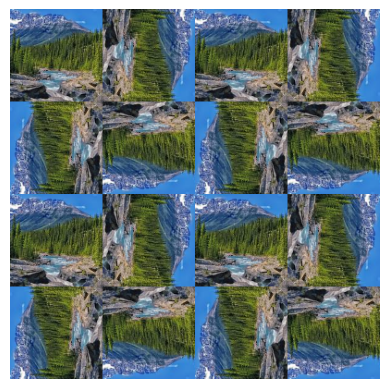

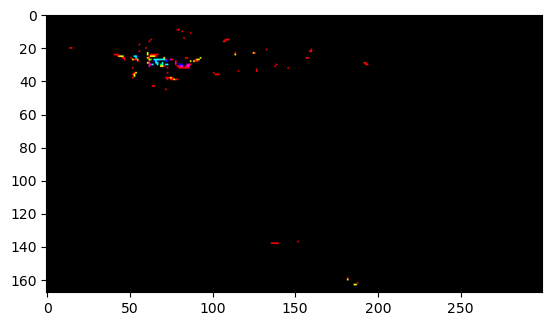

In [40]:
fn = './images/mountain.jpg'
m = 100
n = 2

p1_checker(fn, m, n)

Final shape is (256, 256, 3)


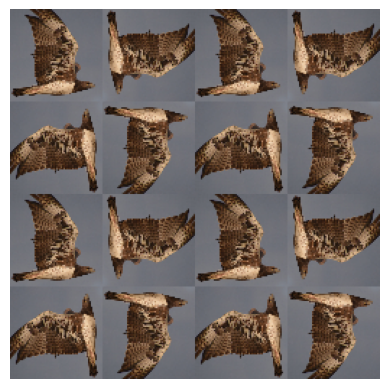

In [655]:
fn = './images/eagle.jpg'
m = 64
n = 8

p1_checker(fn, m, n)

## Problem 2



In [656]:
def p2_vignette(fn, r0, c0):
    ""
    im = cv2.imread(fn)
    M = im.shape[0]
    N = im.shape[1]
    
    
    #Calculating max distance for any pixel from r0,c0
    d_max = math.sqrt(max(r0, M-1-r0)**2 + max(c0, N-1-r0)**2)
    
    """
    Creating 2-D arrays that have in each row/column their respected row/column index by utilizing vector addition.
    First created the 1-D vector to add to each row. In the case of columns (index_j) simply adding was enough.
    For rows (index_i) needed to transpose to produce the correct indices for each row.
    """
    indices = np.arange(M)
    
    index_i = np.zeros((N,M))
    index_i = index_i + indices[:]
    index_i = np.transpose(index_i, (1, 0))

    index_j = np.zeros((M,N))
    indices = np.arange(N)
    index_j = index_j + indices[:]
    
    #Produced D array by using the provided formula, where value at i,j is distance to r0,c0
    D = np.zeros((M,N))
    D = D + np.sqrt((index_i-r0)**2 + (index_j-c0)**2)
    
    #Weight array
    W = np.zeros((M,N))
    W = 1 - np.sqrt(D/d_max)
    
    #Adds new dimension to W to create (168,300,1) and multiplies with original image to create vignette
    new_W = np.expand_dims(W, axis=-1)
    I = im * new_W
    
    #Converts from float back to original image datatype so there isn't any mess
    I = I.astype(im.dtype)
    
    print('d_m =', f'{d_max:.1f}')
    
    #Prints to two decimal points
    print('W[' + str(M//4) + ',' + str(N//4) + ']'+ ' = ' + f'{W[M//4][N//4]:.2f}')
    print('W[' + str(M//4) + ',' + str(3*N//4) + ']'+ ' = ' + f'{W[M//4][3*N//4]:.2f}')
    print('W[' + str(3*M//4) + ',' + str(N//4) + ']'+ ' = ' + f'{W[3*M//4][N//4]:.2f}')
    print('W[' + str(3*M//4) + ',' + str(3*N//4) + ']'+ ' = ' + f'{W[3*M//4][3*N//4]:.2f}')
    
    #Image stays in BGR form so must constantly reverse to RGB for each value access
    print('I[' + str(M//4) + ',' + str(N//4) + ']'+ ' =', I[:,:,::-1][M//4][N//4])
    print('I[' + str(M//4) + ',' + str(3*N//4) + ']'+ ' =', I[:,:,::-1][M//4][3*N//4])
    print('I[' + str(3*M//4) + ',' + str(N//4) + ']'+ ' =', I[:,:,::-1][3*M//4][N//4])
    print('I[' + str(3*M//4) + ',' + str(3*N//4) + ']'+ ' =', I[:,:,::-1][3*M//4][3*N//4])
    
    plt.axis('off')
    plt.imshow(I[:,:,::-1])
    plt.show()

d_m = 223.6
W[42,75] = 0.21
W[42,225] = 0.47
W[126,75] = 0.24
W[126,225] = 0.60
I[42,75] = [12 17 34]
I[42,225] = [32 56 79]
I[126,75] = [27 26 21]
I[126,225] = [74 81 41]


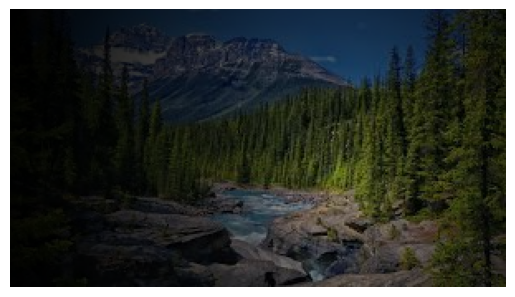

In [657]:
fn = "./images/mountain.jpg"
r0 = 100
c0 = 200

p2_vignette(fn, r0, c0)

d_m = 435.0
W[85,128] = 0.45
W[85,384] = 0.43
W[255,128] = 0.37
W[255,384] = 0.35
I[85,128] = [104 104 106]
I[85,384] = [101 101 102]
I[255,128] = [55 51 47]
I[255,384] = [4 4 9]


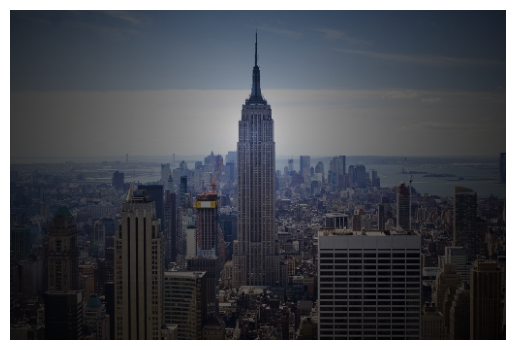

In [658]:
fn = "./images/skyline.jpg"
r0 = 130
c0 = 250

p2_vignette(fn, r0, c0)

## Problem 3


In [659]:
def p3_block(fn, m, n, b):
    im = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    s_m = im.shape[0]/m
    s_n = im.shape[1]/n
    
    downsize = np.zeros((m,n))
    
    #Loops through pixels in downsize and uses i,j to splice regions in the original image, averaging them for each pixel
    for i in range(m):
        for j in range(n):
            region = im[round(i*s_m):round((i+1)*s_m), round(j*s_n):round((j+1)*s_n)]
            downsize[i,j] = np.average(region)
    
    #Finds all values in downscaled image that are greater than the median and sets them to 255, else 0
    threshold = np.median(downsize)
    binary = np.where(downsize >= threshold, 255, 0)

    #Converts type to uint8 and upsamples image
    binary = binary.astype(im.dtype)
    
    #Regular resize made resulting image blurred and so I looked up the resize arguments and tried all interpolations 
    #(scaler.com)
    binary = cv2.resize(binary, (binary.shape[1]*b, binary.shape[0]*b), interpolation=cv2.INTER_NEAREST)
    
    print('Downsized images are', downsize.shape)
    print('Block images are', binary.shape)
    print('Average intensity at (' + str(m//4) + ', ' + str(n//4) + ') is ' + f'{downsize[m//4][n//4]:.1f}')
    print('Average intensity at (' + str(m//4) + ', ' + str(3*n//4) + ') is ' + f'{downsize[m//4][3*n//4]:.1f}')
    print('Average intensity at (' + str(3*m//4) + ', ' + str(n//4) + ') is ' + f'{downsize[3*m//4][n//4]:.1f}')
    print('Average intensity at (' + str(3*m//4) + ', ' + str(3*n//4) + ') is ' + f'{downsize[3*m//4][3*n//4]:.1f}')
    print('Binary threshold:', f'{threshold:.1f}')
        
    plt.axis('off')
    plt.gray()
    plt.imshow(downsize)
    plt.imshow(binary)
    plt.show()

Downsized images are (25, 18)
Block images are (375, 270)
Average intensity at (6, 4) is 59.2
Average intensity at (6, 13) is 55.5
Average intensity at (18, 4) is 158.3
Average intensity at (18, 13) is 35.3
Binary threshold: 134.7


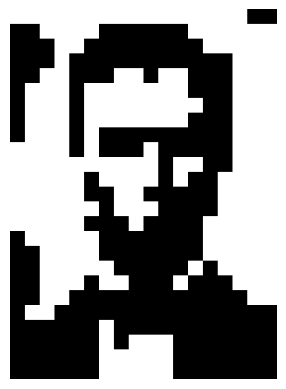

In [660]:
fname = "./images/lincoln1.jpg"
m = 25
n = 18
b = 15

p3_block(fname, m, n, b)

Downsized images are (30, 16)
Block images are (420, 224)
Average intensity at (7, 4) is 22.0
Average intensity at (7, 12) is 27.1
Average intensity at (22, 4) is 15.1
Average intensity at (22, 12) is 27.3
Binary threshold: 27.7


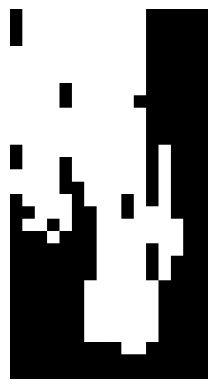

In [661]:
fname = "./images/ginsburg.jpg"
m = 30
n = 16
b = 14

p3_block(fname, m, n, b)